In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl  
mpl.rcParams['figure.dpi'] = 400


In [3]:
data = pd.read_csv('cleaned_data.csv')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['LIMIT_BAL'].values.reshape(-1,1),data['default payment next month'].values, test_size=0.2, random_state=24)

In [5]:
print(X_train.shape)
print(y_test.shape)

(21331, 1)
(5333,)


In [6]:
print(y_train)
print(y_test)

[1 1 0 ... 1 1 0]
[0 0 0 ... 0 0 1]


In [7]:
data['default payment next month'].mean()

0.2217971797179718

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 

In [15]:
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, 
                                intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, 
                                verbose=0, warm_start=False)

In [16]:
model.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='ovr')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [17]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [18]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

##FOR THE EDUCATION FEATURE  

In [68]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(data['EDUCATION'].values.reshape(-1,1),data['default payment next month'].values, test_size=0.2, random_state=24)

In [69]:
model1 = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, 
                                intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, 
                                verbose=0, warm_start=False)

In [71]:
model1.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [72]:
is_correct1 = y_pred == y_test1
np.mean(is_correct1)

0.7834239639977498

### ROC AUC FOR LIMIT_BAL

In [57]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.74826949, 0.25173051],
       [0.5842971 , 0.4157029 ],
       [0.7960448 , 0.2039552 ],
       ...,
       [0.5842971 , 0.4157029 ],
       [0.82721525, 0.17278475],
       [0.66393453, 0.33606547]])

In [58]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173051, 0.4157029 , 0.2039552 , ..., 0.4157029 , 0.17278475,
       0.33606547])

In [116]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import auc 

In [65]:
auc_score = roc_auc_score(y_test, pos_proba)
auc_score

0.6201990844642832

## ROC ACCURACY FOR EDUCATION 

In [73]:
y_pred_proba1 = model1.predict_proba(X_test1)
y_pred_proba1

array([[0.77461103, 0.22538897],
       [0.77461103, 0.22538897],
       [0.79035206, 0.20964794],
       ...,
       [0.79035206, 0.20964794],
       [0.79035206, 0.20964794],
       [0.79035206, 0.20964794]])

In [75]:
auc_score1 = roc_auc_score(y_test1,y_pred_proba1[:,1])
auc_score1

0.5434650477972642

_________________________________________________________________________
**Now, plot the ROC curve.**


In [27]:
P = sum(y_test)

In [30]:
TP = sum(y_test == 1) & (y_pred == 1) 


In [37]:
TPR = TP/P
TPR

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
FN = sum(y_test == 1) & (y_pred == 1)

In [38]:
FNR = FN/sum(y_test)
FNR

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N


In [43]:
TNR

1.0

In [46]:
FPR

0.0

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
tpr

array([0.        , 0.03376623, 0.13852814, 0.22337662, 0.23809524,
       0.36709957, 0.4008658 , 0.42597403, 0.47619048, 0.49350649,
       0.53766234, 0.55411255, 0.58441558, 0.60952381, 0.63549784,
       0.67359307, 0.69350649, 0.7038961 , 0.73766234, 0.74112554,
       0.79047619, 0.80692641, 0.82077922, 0.83809524, 0.85800866,
       0.86666667, 0.87445887, 0.87705628, 0.88658009, 0.8952381 ,
       0.91428571, 0.91774892, 0.92380952, 0.92987013, 0.93419913,
       0.94112554, 0.96190476, 0.96363636, 0.96709957, 0.96969697,
       0.97402597, 0.97402597, 0.97489177, 0.97662338, 0.97662338,
       0.98268398, 0.98614719, 0.98614719, 0.98614719, 0.98701299,
       0.9965368 , 0.9965368 , 0.9965368 , 0.9974026 , 0.9974026 ,
       0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 ,
       0.9991342 , 0.9991342 , 0.9991342 , 1.        , 1.        ])

Text(0.5, 1.0, 'ROC curve')

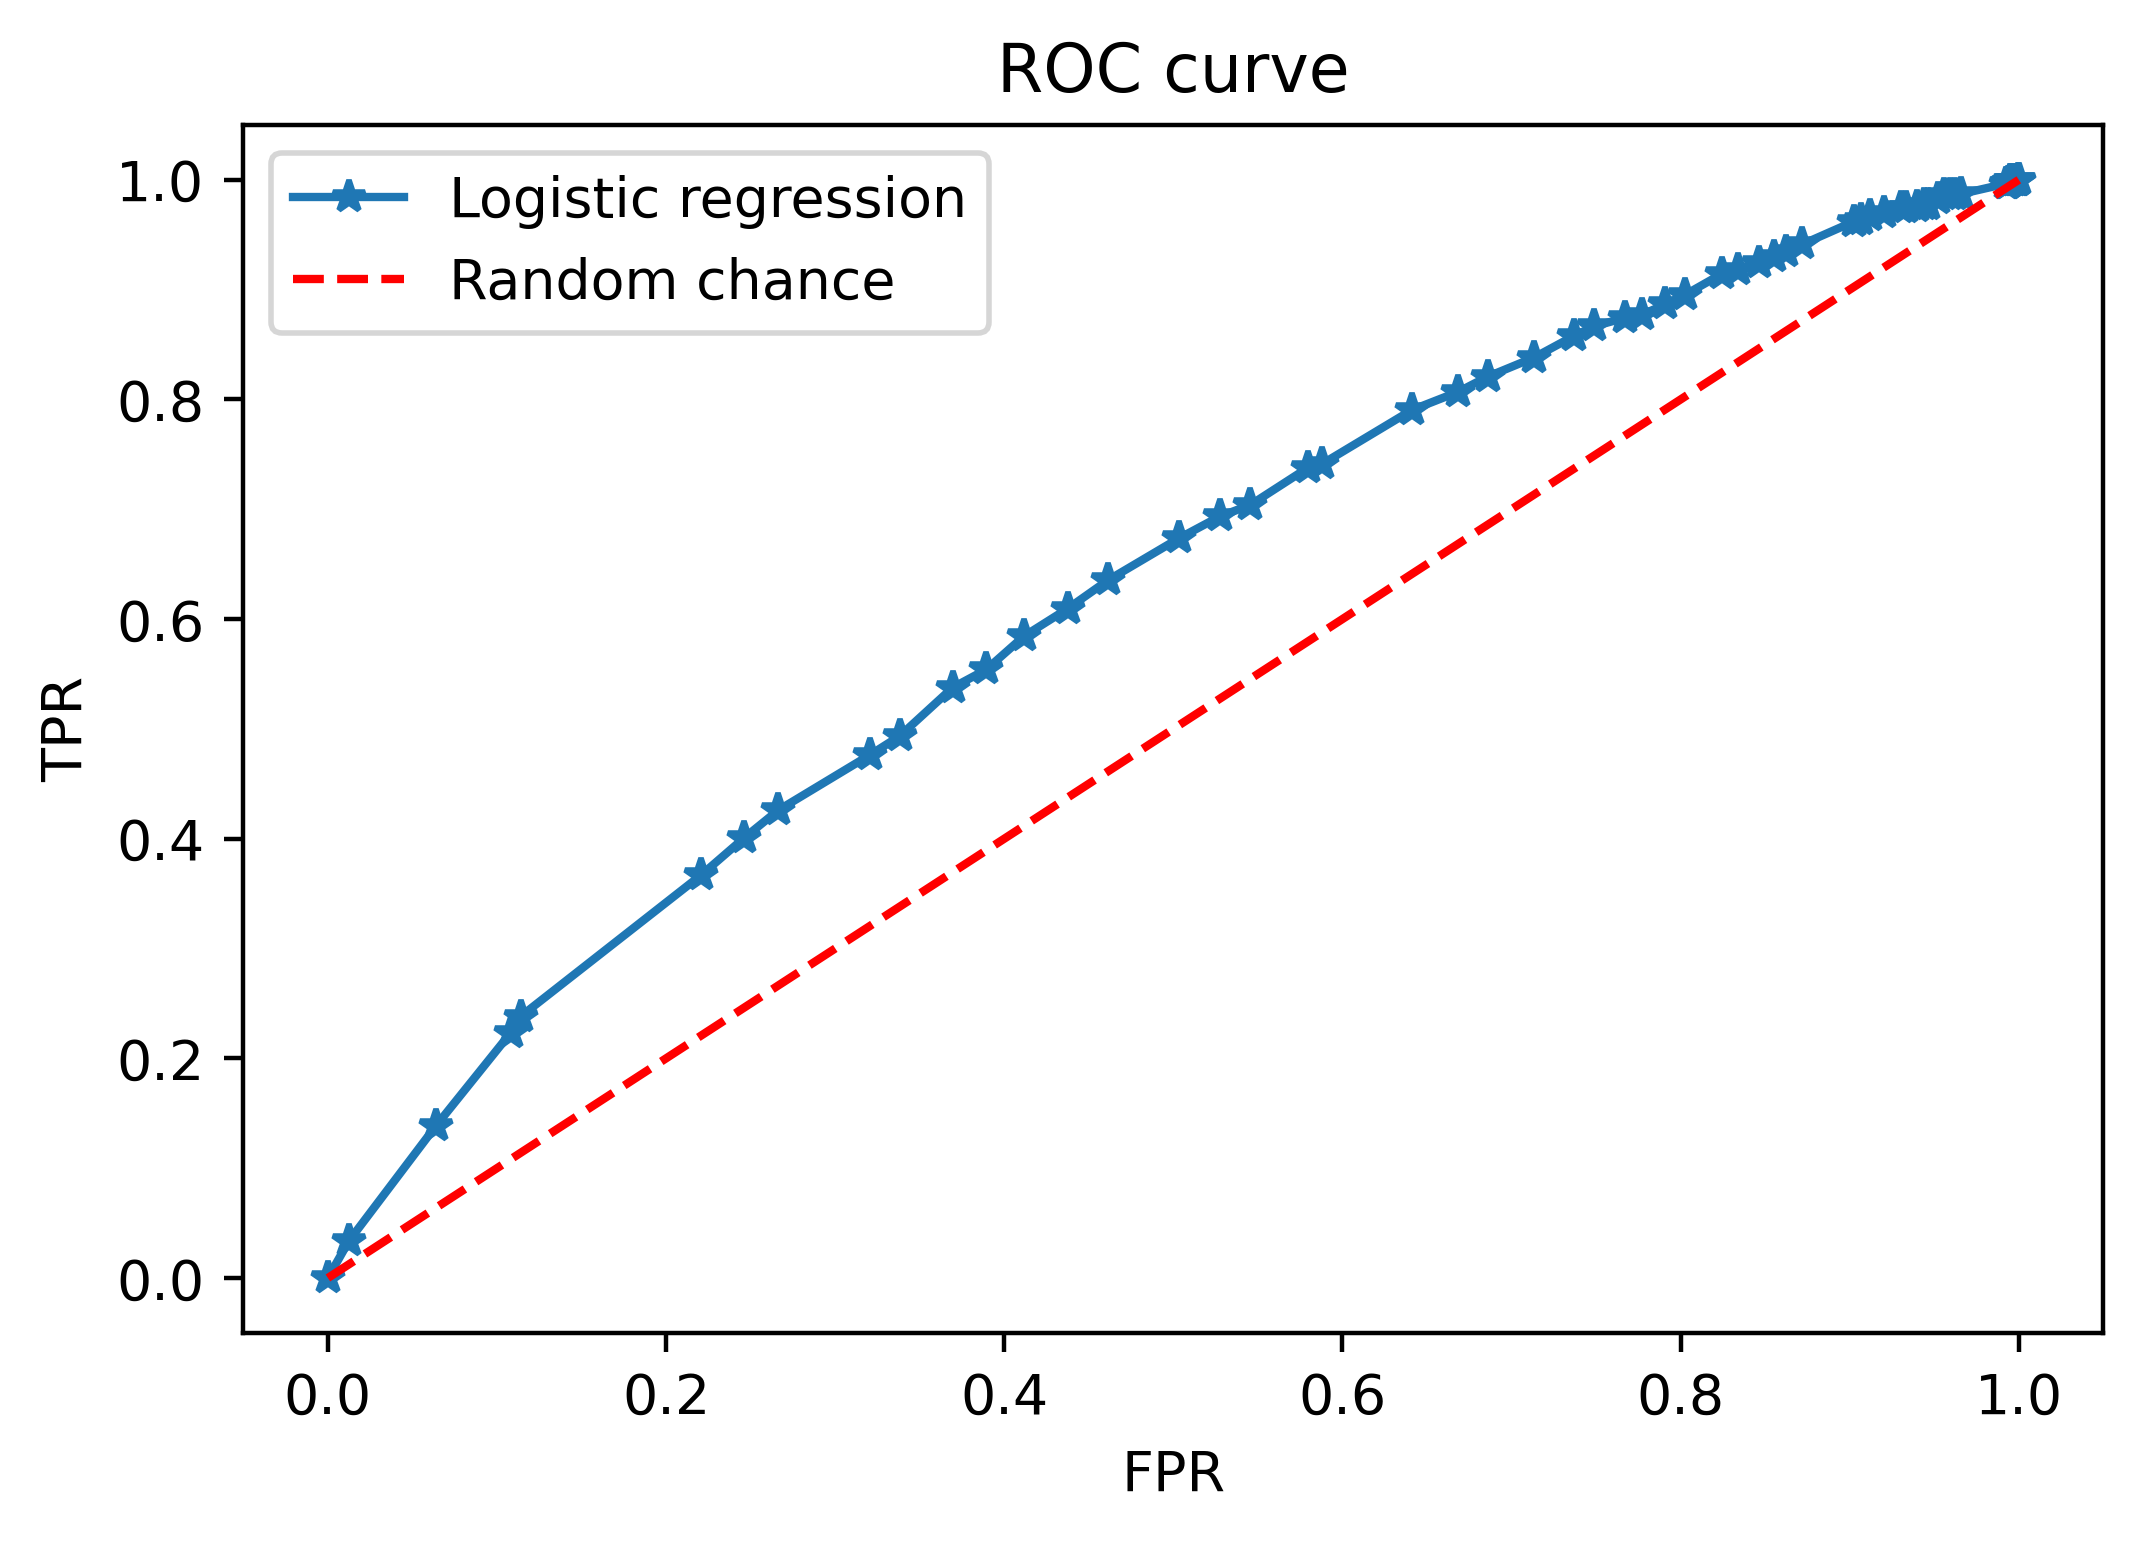

In [85]:
plt.plot(fpr, tpr , '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

## Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**
__________________________________________________________________
 

In [105]:
from sklearn.metrics import precision_recall_curve

In [109]:
precision1 = TP/(TP + FP)


C:\Users\ananya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [113]:
precision, recall, thresholds1 = precision_recall_curve(y_test,pos_proba)
precision


array([0.21661665, 0.21651032, 0.21663225, 0.21667293, 0.21671362,
       0.21687653, 0.21695807, 0.21712135, 0.21724398, 0.21728488,
       0.2173258 , 0.21715363, 0.21719457, 0.21704695, 0.21716981,
       0.21725179, 0.22033243, 0.22073643, 0.22129396, 0.22189753,
       0.22198318, 0.22200354, 0.22244133, 0.22283792, 0.22392516,
       0.22441652, 0.22553363, 0.22670997, 0.22714286, 0.22761729,
       0.22985832, 0.2305063 , 0.23116659, 0.231755  , 0.23327465,
       0.23466667, 0.23569638, 0.23654424, 0.23784926, 0.23956357,
       0.24237288, 0.24342913, 0.24518744, 0.24855794, 0.25020134,
       0.25417595, 0.25845411, 0.26031164, 0.26293661, 0.26655574,
       0.27004512, 0.27573253, 0.27804107, 0.28183716, 0.28231142,
       0.28683603, 0.28744327, 0.29115934, 0.30654206, 0.31032172,
       0.31477357, 0.36617843, 0.36338028, 0.37470726, 0.42857143,
       1.        ])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


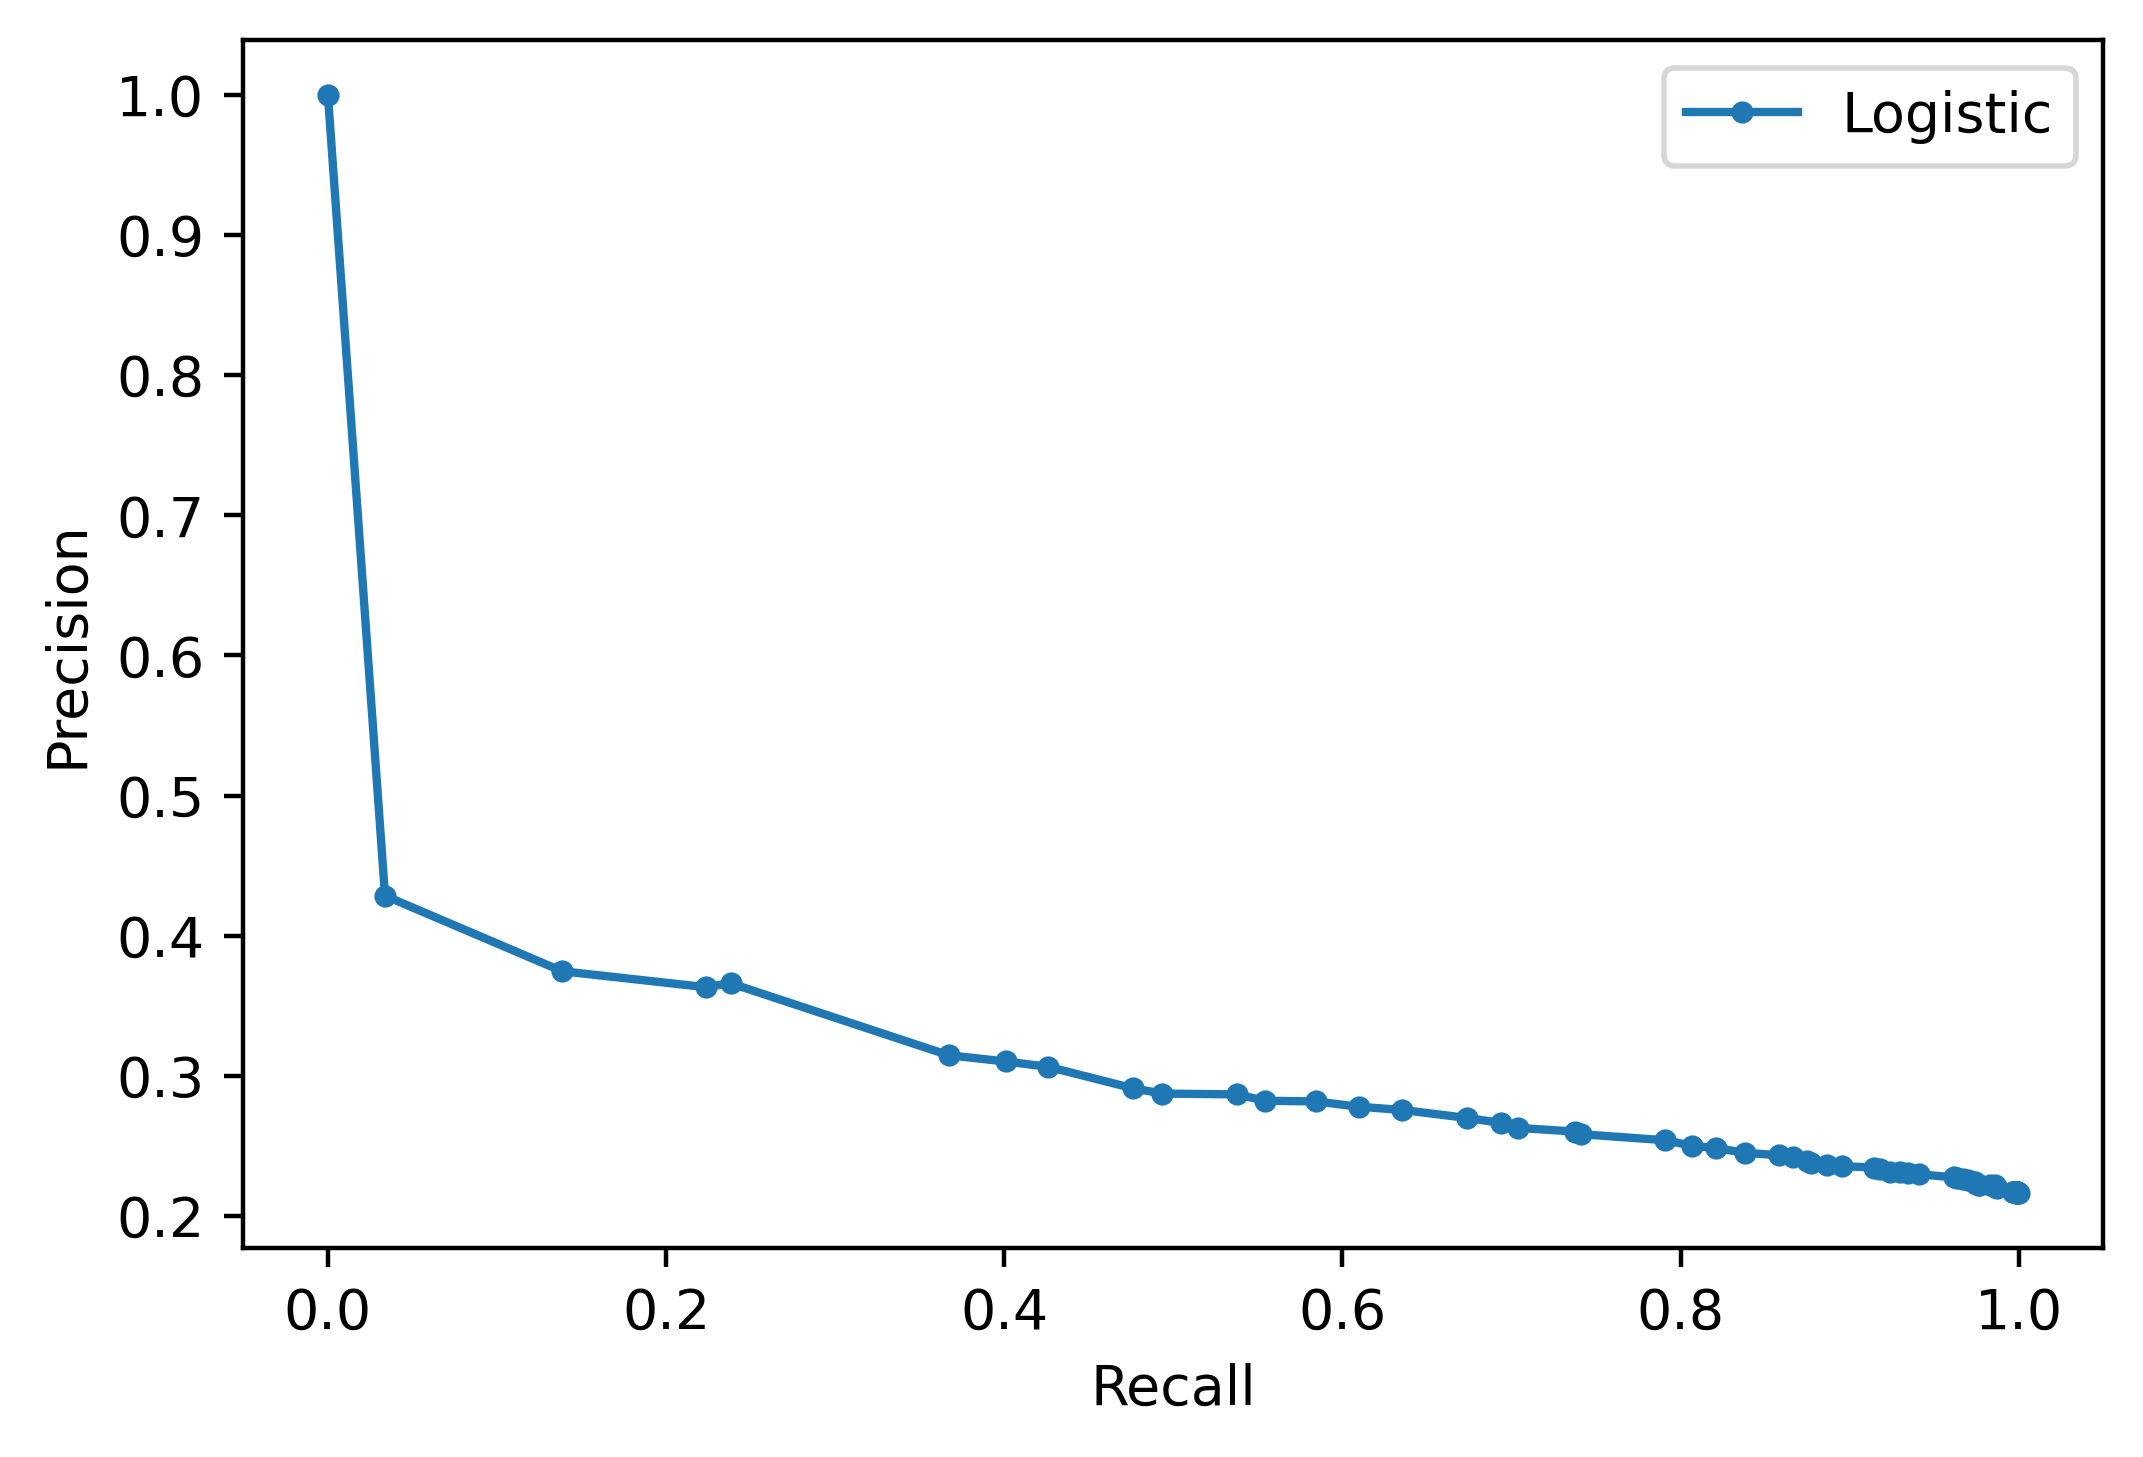

In [114]:
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [118]:
auc_score = auc(recall, precision)
auc_score

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [124]:
y_pred_proba2 = model.predict_proba(X_train)
y_pred_proba2

array([[0.69361043, 0.30638957],
       [0.78476728, 0.21523272],
       [0.9458172 , 0.0541828 ],
       ...,
       [0.550889  , 0.449111  ],
       [0.73522892, 0.26477108],
       [0.92064618, 0.07935382]])

In [125]:
pos_proba2 = y_pred_proba2[:,1]
pos_proba2

array([0.30638957, 0.21523272, 0.0541828 , ..., 0.449111  , 0.26477108,
       0.07935382])

In [128]:
auc_score2 = roc_auc_score(y_train,pos_proba2)
auc_score2

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
